Problem Satement:

A telecom company is facing a high customer churn rate and wants to reduce it. Customer churn refers to the process where a customer stops doing business with a company. In the telecom industry, customer churn is a major problem as acquiring new customers is more expensive than retaining existing customers. The company wants to use machine learning to predict which customers are likely to churn so that they can take proactive measures to retain them.

About Dataset: The dataset contains information on customer demographic, account information, services used, and whether or not they have churned. The target variable is a binary column indicating whether the customer has churned (1) or not (0). Content : Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [13]:
#Import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [14]:
#load data
df_train=pd.read_excel("/content/train.xlsx")

Interpreting the Dataset

In [15]:
#check top 5 records of data
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#Check the  attributes of data like shape (rows and cols)
df_train.shape

(7043, 21)

In [17]:
#Check the  column names present in data
df_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
# Check the descriptive statistics of numeric variables
df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
# check Summary of the dataframe, as we have too many columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Cleaning

In [20]:
#check count the number of unique values in a particular column.
df_train["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
#The boolean values indicate whether each element of the original DataFrame is missing (NaN) or not and that returns the sum of all the values for each column
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#Total Charges should be numeric amount. Let's convert it to numerical data type
df_train.TotalCharges = pd.to_numeric(df_train.TotalCharges, errors='coerce')
df_train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
## As we can see there are 11 missing values in TotalCharges column. Let's check these records
df_train.loc[df_train['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [24]:
df_train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
#Removing missing values 
df_train.dropna(how = 'any', inplace = True)

In [26]:
#drop column customerID 
df_train.drop(columns= ['customerID'], axis=1, inplace=True)
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# print numerical columns
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", num_cols)

# print categorical columns
cat_cols = df_train.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Numerical columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [28]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# apply label encoding to each categorical column in the dataframe
for col in cat_cols:
    df_train[col] = le.fit_transform(df_train[col])

In [29]:
def find_outliers(df_train):
    numeric_data = df_train.select_dtypes(include=[np.number]).values
    q1 = np.quantile(numeric_data, 0.25, axis=0)
    q3 = np.quantile(numeric_data, 0.75, axis=0)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = []
    for i, col in enumerate(df_train.select_dtypes(include=[np.number]).columns):
        col_outliers = df_train[(df_train[col] < lower_bound[i]) | (df_train[col] > upper_bound[i])][col]
        outliers.append(col_outliers.to_list())
    return outliers

In [30]:
outliers = find_outliers(df_train)
print(outliers)

[[], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [31]:
def replace_outliers(df_train):
    outliers = find_outliers(df_train)
    for i, col_outliers in enumerate(outliers):
        if col_outliers:
            median = df_train[df_train.columns[i]].median()
            df_train.loc[df_train[df_train.columns[i]].isin(col_outliers), df_train.columns[i]] = median
    return df_train


Data Visualization

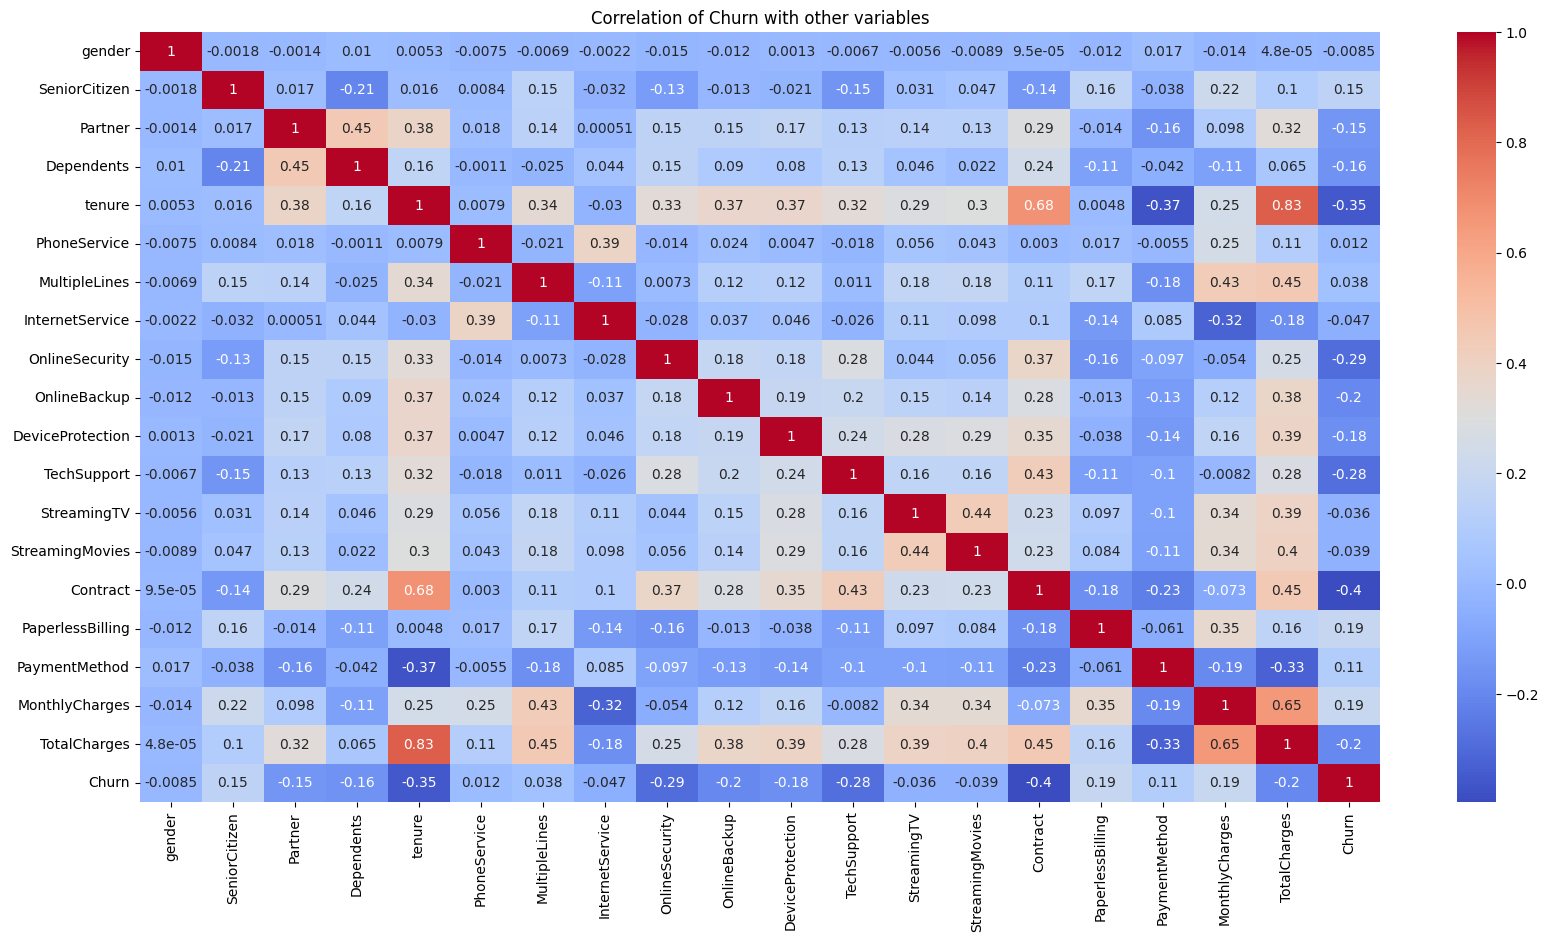

In [32]:
# create a correlation matrix
corr_matrix = df_train.corr()

# plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Churn with other variables')
plt.show()

 Churn Distribution

In [33]:
import plotly.graph_objects as go
import plotly.offline as py
trace = go.Pie(labels = df_train["Churn"].value_counts().keys().tolist(),
               values = df_train["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

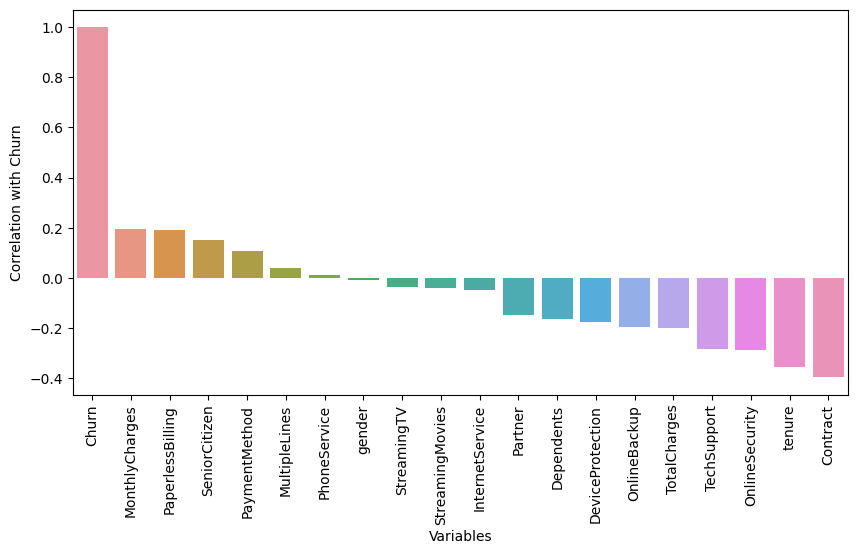

In [34]:
# get correlation of "Churn" with other variables
corr_matrix = df_train.corr()["Churn"].sort_values(ascending=False)

# plot bar chart of correlations
plt.figure(figsize=(10,5))
sns.barplot(x=corr_matrix.index, y=corr_matrix.values)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Correlation with Churn")
plt.show()

<Axes: xlabel='gender', ylabel='count'>

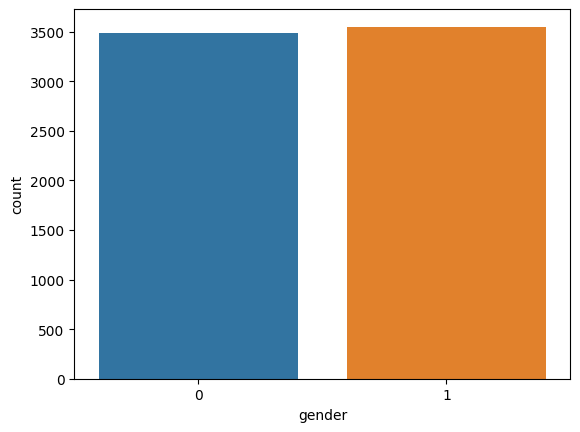

In [35]:
sns.countplot(x='gender', data=df_train)

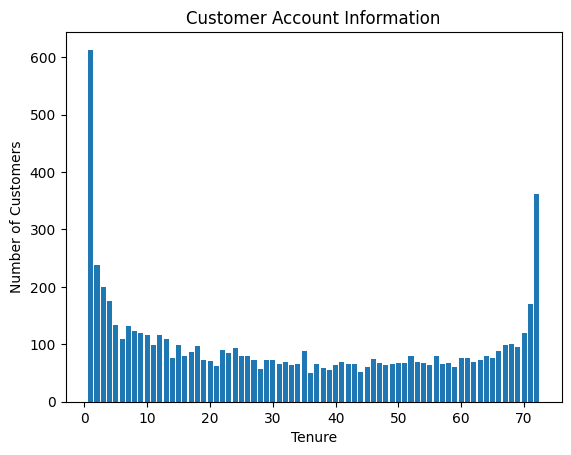

In [36]:
# count the number of customers by account type
account_counts = df_train['tenure'].value_counts()

# create a bar chart of account type counts
plt.bar(account_counts.index, account_counts.values)

# set the title and labels for the chart
plt.title('Customer Account Information')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

# display the chart
plt.show()

Text(0.5, 1.0, 'of Customers by Contract Type')

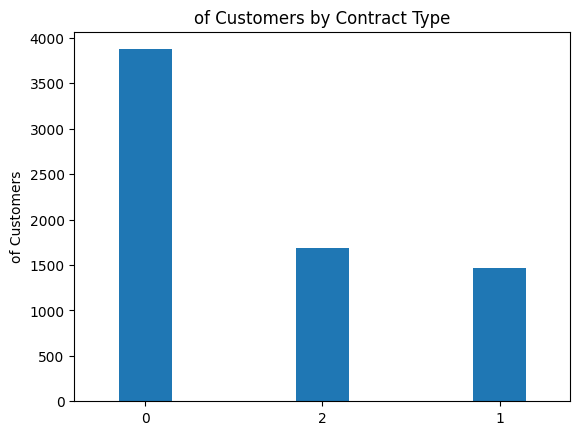

In [37]:
ax = df_train['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('of Customers')
ax.set_title('of Customers by Contract Type')

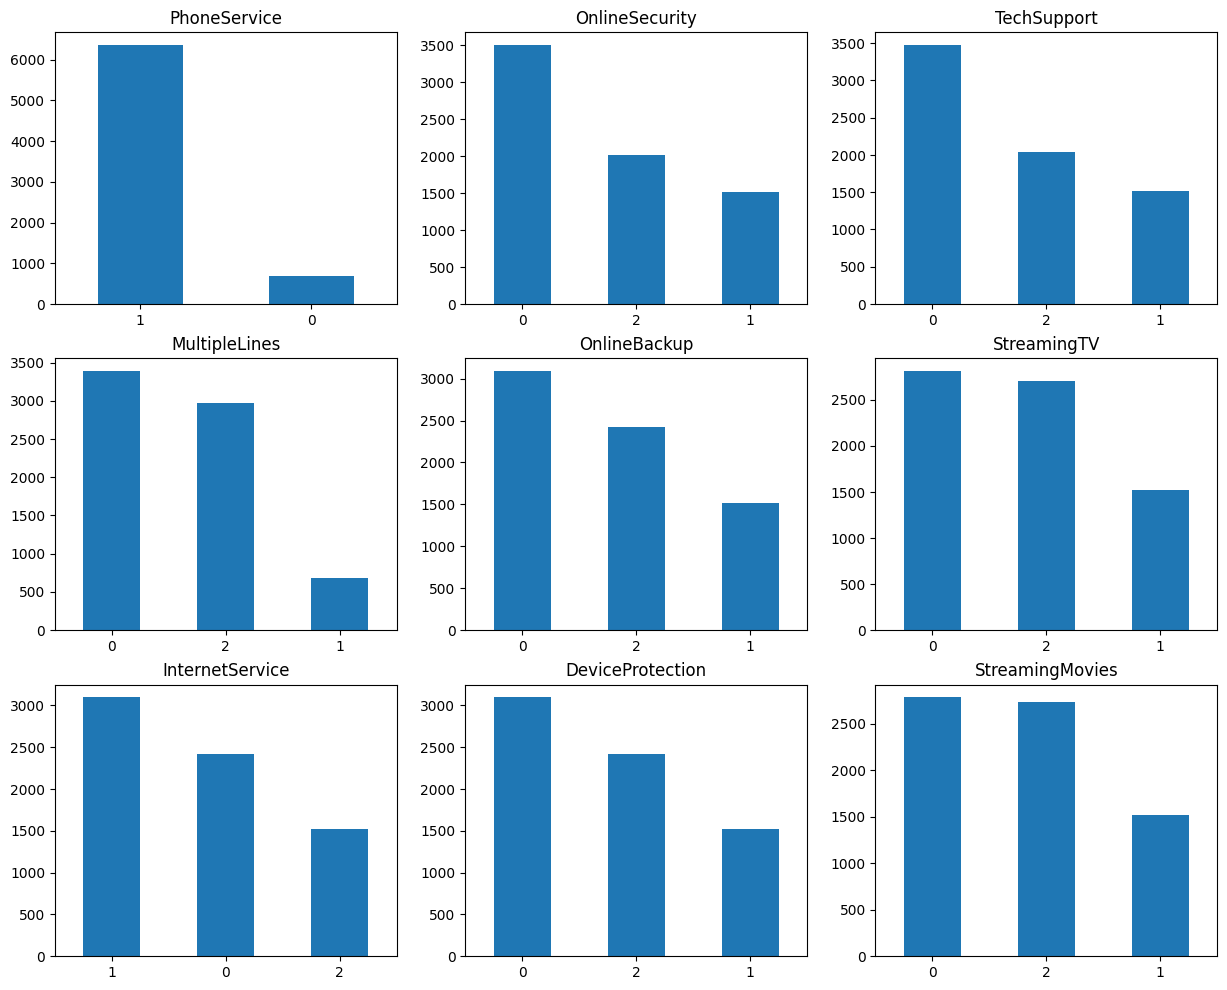

In [38]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df_train[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df_train[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df_train[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Text(0.5, 1.0, 'Churn by Contract Type')

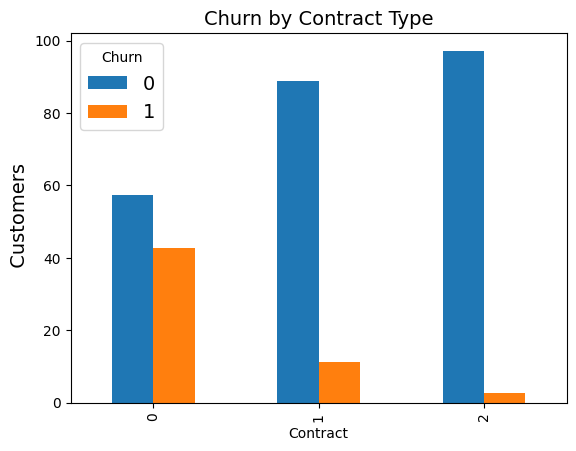

In [39]:
contract_churn = df_train.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar')
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel(' Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

Feature and Target relationship Distribution Graphs

Monthly Charges VS Churn

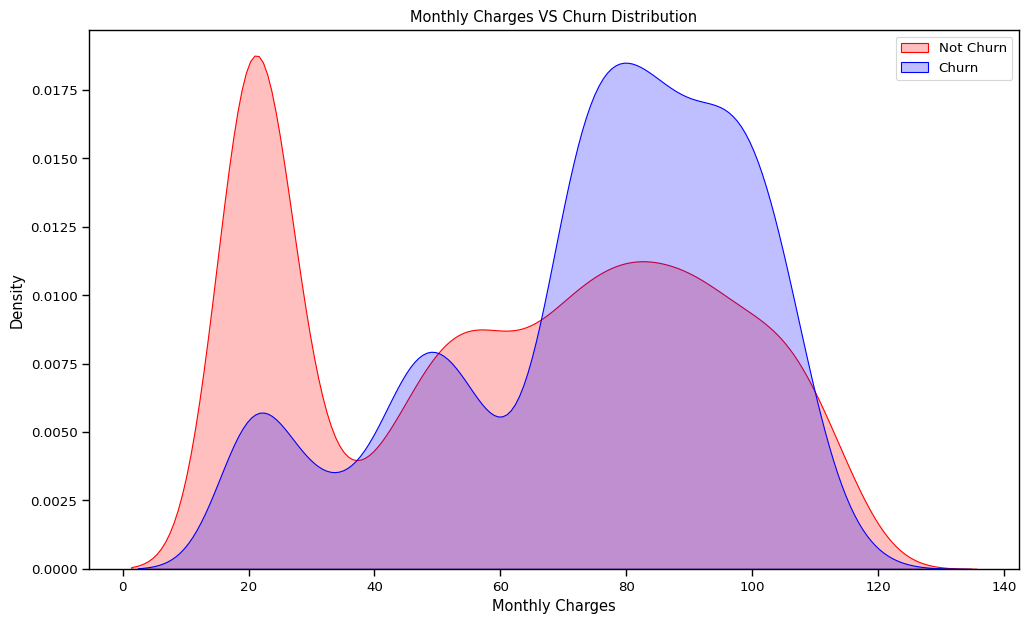

In [40]:
plt.rcParams['figure.figsize']=(12,7)

sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(df_train.MonthlyCharges[(df_train["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df_train.MonthlyCharges[(df_train["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

High Monthly Charges are also one of a reason which makes Customers more likely to churn

Total Charges VS Churn

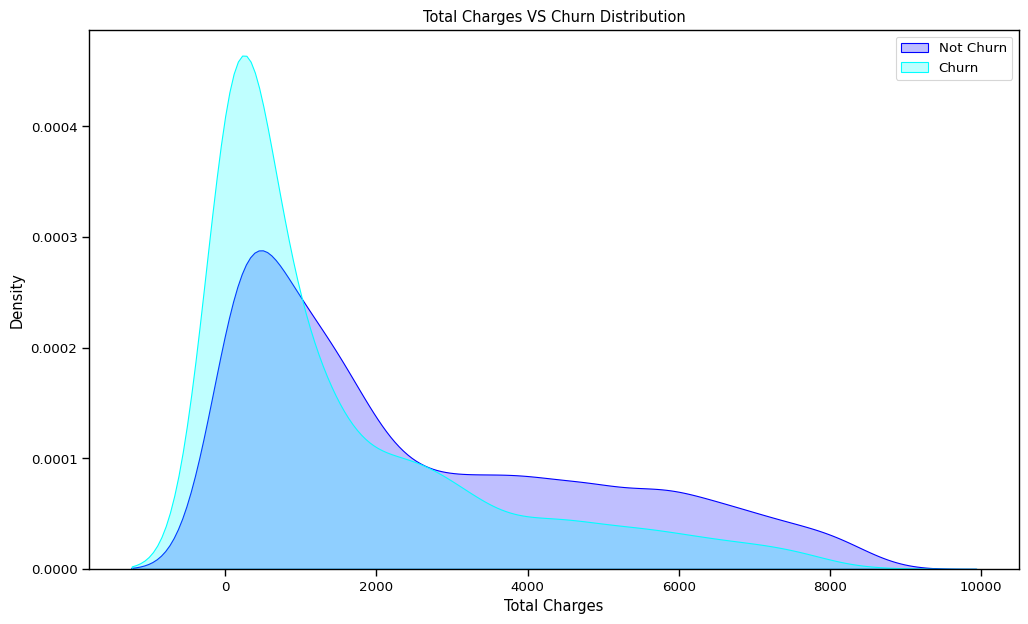

In [41]:
ax = sns.kdeplot(df_train.TotalCharges[(df_train["Churn"] == 0) ],
                color="blue", shade = True);
ax = sns.kdeplot(df_train.TotalCharges[(df_train["Churn"] == 1) ],
                ax =ax, color="cyan", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

High Total Charges are also one of a reason which makes Customers more likely to churn,there might be an issue with pricing system which needs to addressed

Tenure VS Churn Boxplot

In [42]:
import plotly.express as px
fig = px.box(df_train, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn Boxplot</b>',
)

fig.show()


Splitting the data into train and test sets

In [43]:
y = df_train['Churn'].values
X = df_train.drop(columns = ['Churn'])

In [44]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to target variable only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to pandas dataframe
y_resampled = pd.DataFrame(y_resampled, columns=['Churn'])

In [45]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Multiple Machine Learning Model Evaluations and Testing

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
#predicting the model
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.797676669893514


In [49]:
import xgboost as xgb
# Initialize the classifier
model = xgb.XGBClassifier()
# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
# Predict on the testing data
y_pred = model.predict(X_test)

In [51]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.30%


In [52]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# define the XGBoost classifier and its parameters
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='auc')

# define the hyperparameter grid for the GridSearchCV
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, n_jobs=-1)

# Fit GridSearchCV to data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [53]:
print(grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy:  0.8441888619854723


In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

from sklearn.metrics import accuracy_score

predictions = rfc.predict(X_test)
print(accuracy_score(predictions,y_pred))

0.9211035818005808


In [55]:
from sklearn.metrics import confusion_matrix, classification_report

# assuming y_true and y_pred are the true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print("Confusion Matrix:\n", cm)

# calculate precision, recall, and f1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[862 175]
 [170 859]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1037
           1       0.83      0.83      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [56]:
test=pd.read_excel("/content/test1.xlsx")

In [57]:
y_pred = rfc.predict(test)

In [58]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [62]:
import pickle
filename = 'churn.pkl'

In [60]:
pickle.dump(rfc.predict, open(filename, 'wb'))

In [61]:
load_model = pickle.load(open(filename, 'rb'))